In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
Dataset = pd.read_csv("Dataset_V1.csv")
Dataset.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
display(Dataset)

,ID,Sex,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,1163,0,66,50.0,-1.6,5.0,1.1,320.000000,25.0,4.500000,...,-2.3,-0.8,26.700000,13.0,0,0,0,0,0,0
1,1035,0,65,50.0,-2.6,6.0,0.7,170.000000,17.0,4.200000,...,-3.5,-2.0,28.300000,12.0,1,0,0,0,0,0
2,916,0,72,40.0,-1.7,29.0,0.7,190.000000,19.0,4.300000,...,-3.0,-1.1,24.400000,12.0,0,0,0,0,0,0
3,1358,0,62,40.0,-0.2,1.0,0.9,175.000000,16.0,3.200000,...,-1.5,0.7,22.600000,12.0,0,0,0,0,0,0
4,146,0,76,50.0,-1.6,13.0,1.2,290.000000,23.0,3.300000,...,-1.8,0.3,33.200000,10.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1107,0,65,50.0,-1.0,33.0,0.8,123.000000,12.0,2.300000,...,-2.0,-0.5,27.887189,4.0,0,0,0,0,0,1
1096,1111,1,66,50.0,-4.0,2.0,0.9,208.285305,22.0,3.614121,...,-2.0,-0.5,27.887189,4.0,1,0,0,0,0,0
1097,1115,0,62,50.0,-0.1,19.0,0.9,201.000000,12.0,4.700000,...,-2.0,-0.7,27.887189,4.0,0,0,0,0,0,0
1098,1109,0,56,50.0,0.1,32.0,1.0,153.000000,16.0,4.000000,...,-1.2,-0.2,27.887189,4.0,0,0,0,0,0,0


In [4]:
Dataset.drop("ID", axis=1, inplace=True)
X= Dataset.loc[:, Dataset.columns != 'Refracture']
Y = Dataset["Refracture"]

Optimal number of features : 1
Selected features: ['Calcium_Supplement']


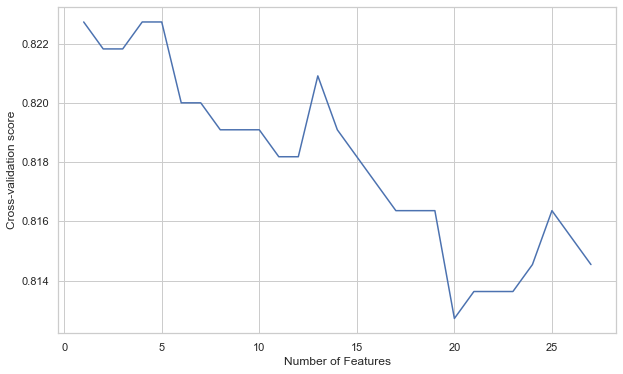

In [8]:
rfecv = RFECV(estimator=LogisticRegression(max_iter=10000, random_state=5), step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)
print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [6]:
#Determining the Best parameters for random forest
randomf = RandomForestClassifier(random_state=5)
parameters = {
    "n_estimators" : [5,10,50,100,250,500,1000],
    "max_depth" : [2,4,8,16,32,None]
}

cv = GridSearchCV(randomf, parameters, cv=10)
cv.fit(X,Y.values.ravel())

def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 5}


0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 5}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 10}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 50}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 100}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 250}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 500}
0.823 + or -0.005 for the {'max_depth': 2, 'n_estimators': 1000}
0.81 + or -0.035 for the {'max_depth': 4, 'n_estimators': 5}
0.817 + or -0.013 for the {'max_depth': 4, 'n_estimators': 10}
0.823 + or -0.005 for the {'max_depth': 4, 'n_estimators': 50}
0.823 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.823 + or -0.005 for the {'max_depth': 4, 'n_estimators': 250}
0.823 + or -0.005 for the {'max_depth': 4, 'n_estimators': 500}
0.823 + or -0.005 for the {'max_depth': 4, 'n_estimators': 1000}
0.793 + or -0.056 for the {'max_depth': 8, 'n_estima

Optimal number of features : 8
Selected features: ['Vit_D3', 'Zscore_vertebra', 'BMD_Hip_total', 'Tscore_Hip_neck', 'BMI', 'Pregnancy_Count', 'Active_Smoking', 'History_Smoking']


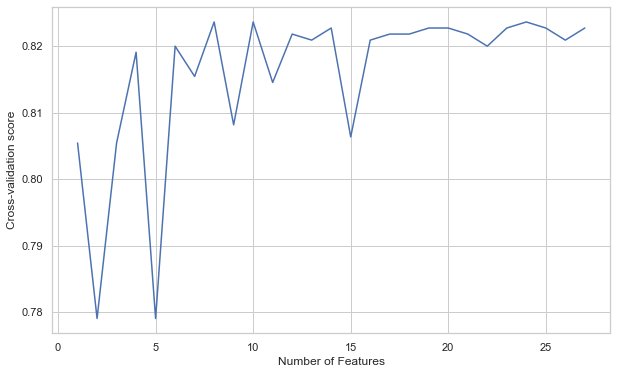

In [9]:
#Revealing the optimal number of features and the features names using RFECV with Random Forest algorithm
rfecv = RFECV(estimator= RandomForestClassifier(max_depth=2, n_estimators = 5,random_state=5), step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [10]:
#Determining the Best parameters for Gradient Boosting
gb = GradientBoostingClassifier(random_state=5)
parameters = {
    "n_estimators" : [5,10,50,100,250,500,1000],
    "max_depth" : [2,4,8,16,32,None],
    "learning_rate": [0.01, 0.1, 0.001],
}

cv = GridSearchCV(gb, parameters, cv=10)
cv.fit(X,Y.values.ravel())

def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

KeyboardInterrupt: 

Optimal number of features : 3
Selected features: ['Age', 'Vit_D3', 'BMD_vertebra']


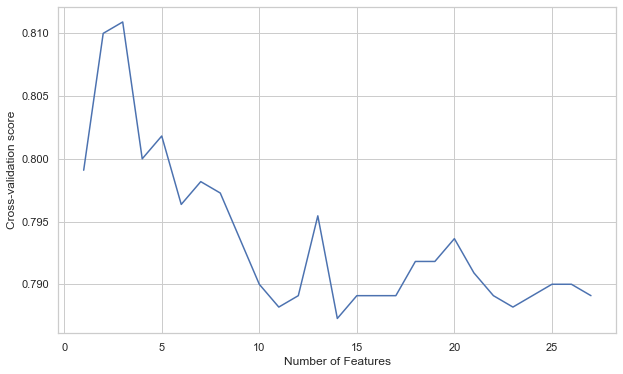

In [13]:
#RFECV using Gradient boosting
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth =2, n_estimators=50,random_state=5)
rfecv = RFECV(gb, step=1, cv=10, scoring="accuracy")
rfecv.fit(X,Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) +1), rfecv.cv_results_["mean_test_score"])
plt.show()

Age                 0.059562
ALP                 0.052265
Vit_D3              0.050247
Ca                  0.049946
BUN                 0.047040
BMD_vertebra        0.045594
BMI                 0.043723
CRP                 0.043407
P                   0.042982
Zscore_vertebra     0.042499
PTH                 0.042118
Tscore_vertebra     0.041445
BMD_Hip_Neck        0.041233
Zscore_hip_total    0.041134
Pregnancy_Count     0.040873
Zscore_Hip_neck     0.039867
Tscore_Hip_neck     0.039550
BMD_Hip_total       0.039477
Cr                  0.039314
Tscore_Hip_total    0.039287
dtype: float64

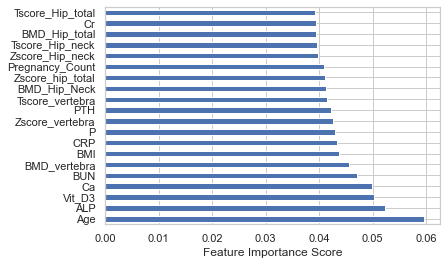

In [14]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Extra trees Classifier
ft_importance_model = ExtraTreesClassifier(random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)

ALP                   0.173343
Tscore_Hip_neck       0.148667
Calcium_Supplement    0.137009
Age                   0.109241
BMD_vertebra          0.082737
CRP                   0.070415
Tscore_vertebra       0.065971
Vit_D3                0.045708
Tscore_Hip_total      0.040293
BMD_Hip_Neck          0.028515
BMD_Hip_total         0.027138
Sex                   0.023706
Zscore_Hip_neck       0.021395
PTH                   0.014400
BMI                   0.011463
Menopause_age         0.000000
Cr                    0.000000
BUN                   0.000000
P                     0.000000
Ca                    0.000000
dtype: float64

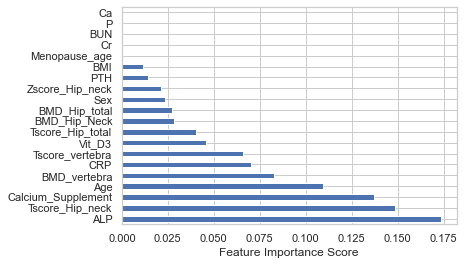

In [15]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Random Forest
ft_importance_model = RandomForestClassifier(max_depth=2, n_estimators = 10,random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)

Age                   0.096210
BMD_vertebra          0.094699
Vit_D3                0.082285
ALP                   0.072079
Pregnancy_Count       0.067951
BUN                   0.056264
BMI                   0.049913
Ca                    0.046864
Menopause_age         0.040664
Tscore_vertebra       0.037005
P                     0.034834
PTH                   0.034114
Calcium_Supplement    0.031856
Tscore_Hip_neck       0.030762
BMD_Hip_total         0.030053
Zscore_Hip_neck       0.027693
BMD_Hip_Neck          0.027334
CRP                   0.024024
Zscore_hip_total      0.023275
Cr                    0.020871
dtype: float64

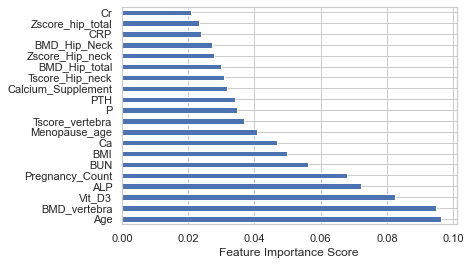

In [16]:
#Revealing the top 20 best features based on their impact on the target variable using feature importance
#Gradient Boosting
ft_importance_model = GradientBoostingClassifier(random_state=5)
ft_importance_model.fit(X,Y)
ft_importance = pd.Series(ft_importance_model.feature_importances_, index = X.columns)
ft_importance.nlargest(20).plot(kind="barh")
plt.xlabel("Feature Importance Score")
ft_importance.nlargest(20)